# EDA - Predicting Diabetes

In [1]:
# IMPORT LIBRARIES
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

1. DATA COLLECTION

In [2]:
df = pd.read_csv("../data/raw/df.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. DATA CLEAN-UP

In [3]:
# 2.1. DIMENSIONS ➞ (rows, columns)
df.shape

(768, 9)

In [4]:
# 2.2. DATA TYPES & NON-NULL VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Observations:
- No NA recods
- 9 numerical charceristics

In [5]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [6]:
df.isna().sum().sort_values(ascending=False) / len(df)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [7]:
# 2.3. DELETE DUPLICATES
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3. UNIVARIATE VARIABLE ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

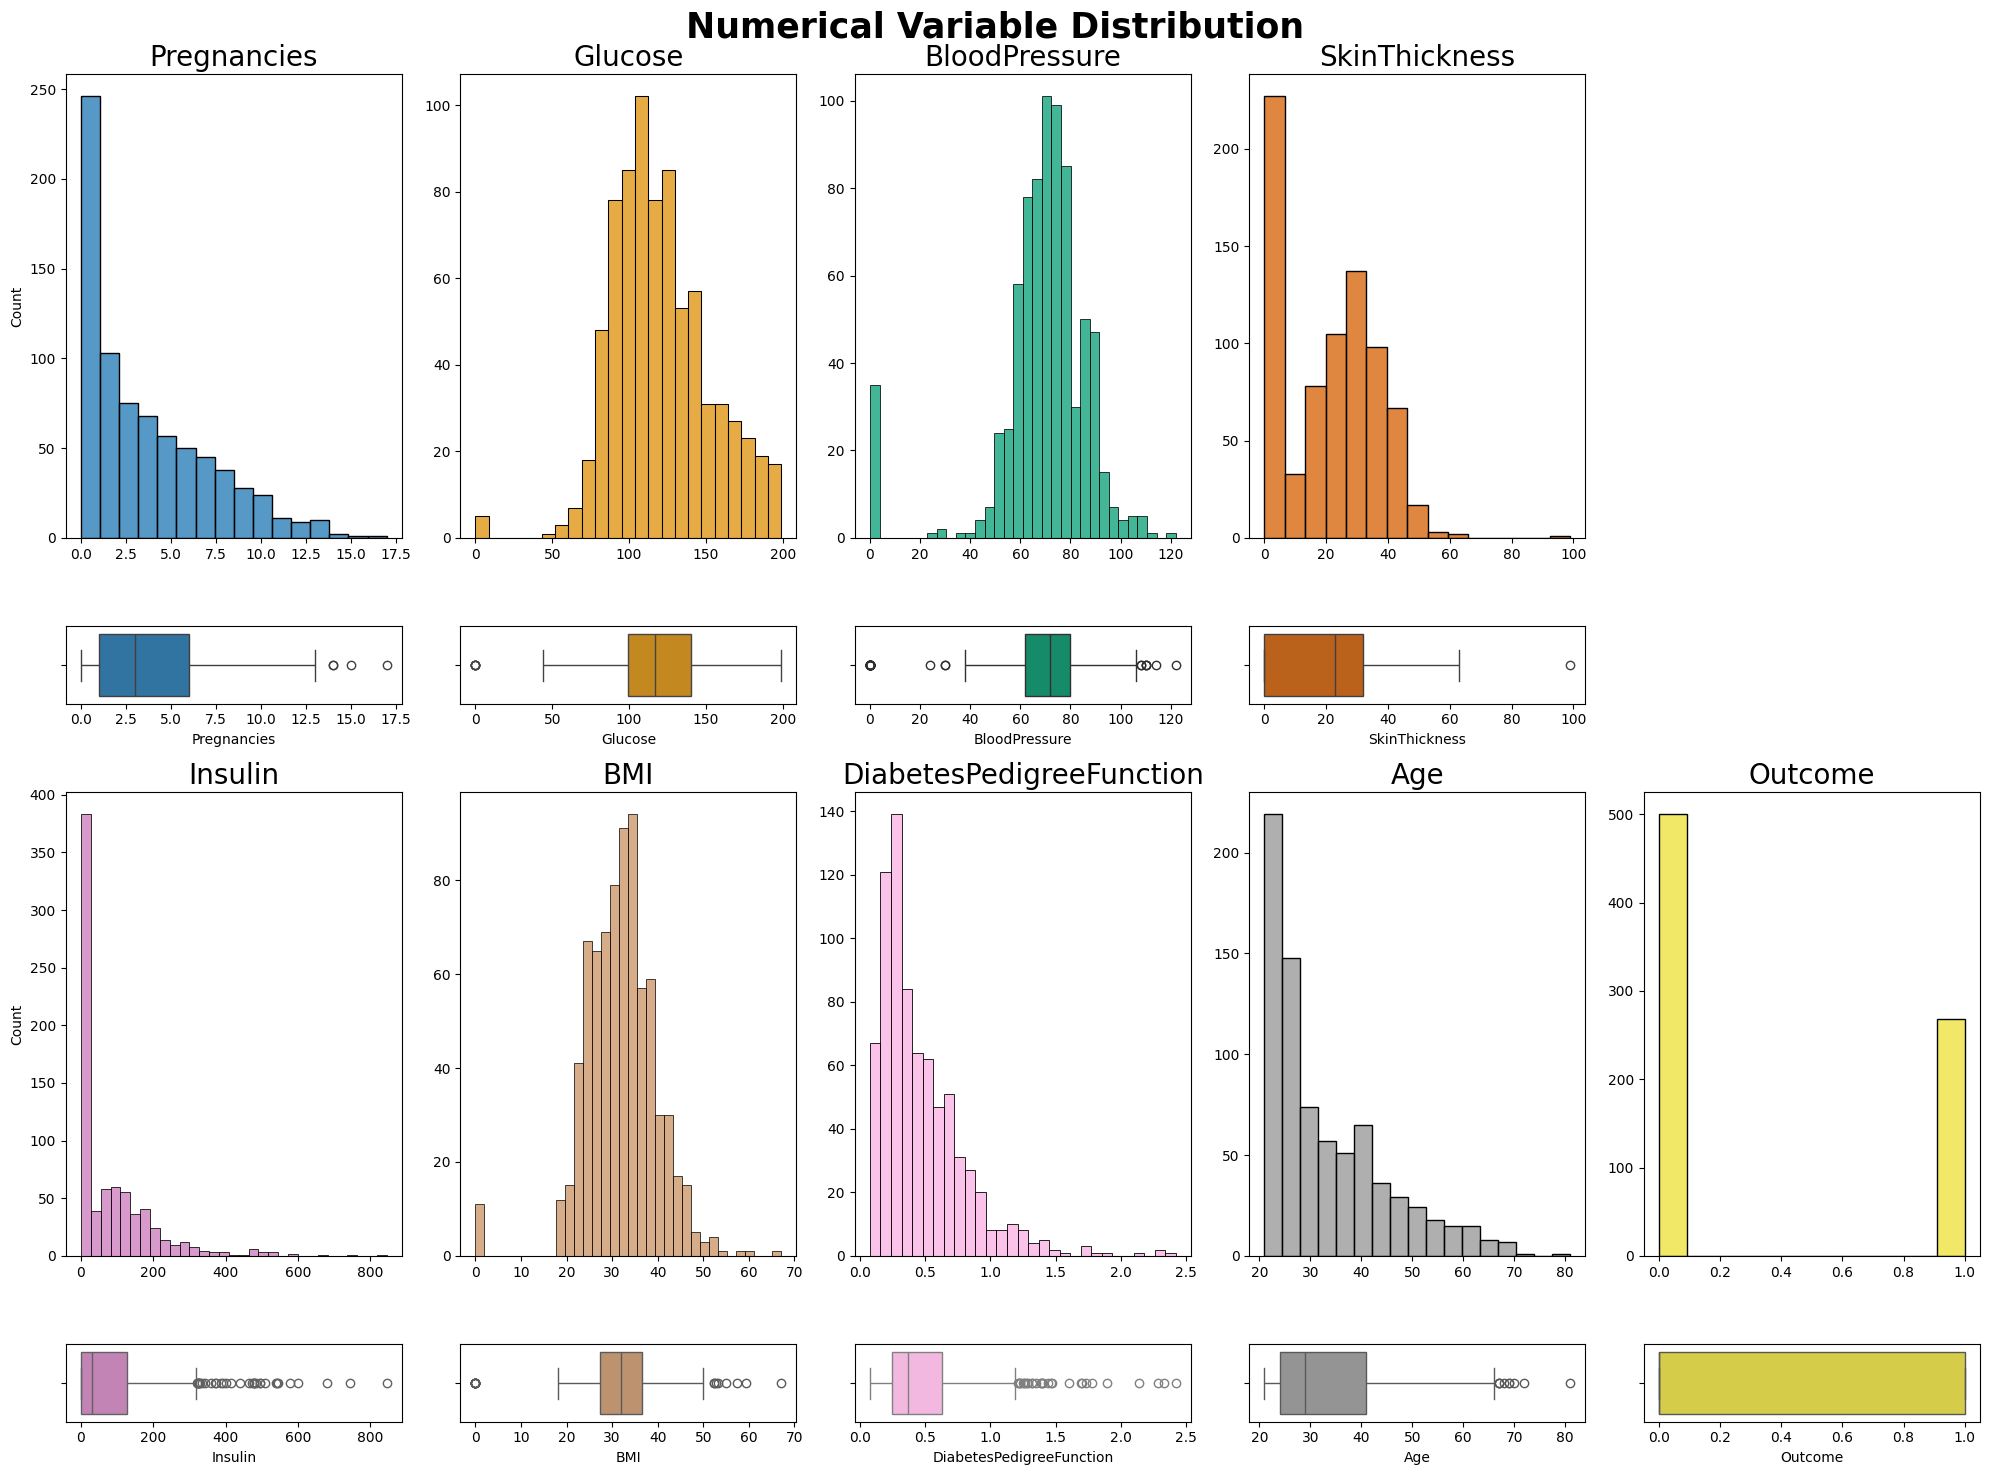

In [8]:
# NUMERICAL (Histogram analysis & boxpot) 
fig, axis = plt.subplots(4, 5, figsize = (20, 15), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})
fig.suptitle("Numerical Variable Distribution", fontsize=25, fontweight='bold')

sns.histplot(ax = axis[0, 0], data = df, x = "Pregnancies").set(xlabel = None)
axis[0, 0].set_title("Pregnancies", fontsize=20)
sns.boxplot(ax = axis[1, 0], data = df, x = "Pregnancies")

sns.histplot(ax = axis[0, 1], data = df, x = "Glucose", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
axis[0, 1].set_title("Glucose", fontsize=20)
sns.boxplot(ax = axis[1, 1], data = df, x = "Glucose", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[0, 2], data = df, x = "BloodPressure", color=sns.color_palette("colorblind")[2]).set(xlabel = None, ylabel = None)
axis[0, 2].set_title("BloodPressure", fontsize=20)
sns.boxplot(ax = axis[1, 2], data = df, x = "BloodPressure", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[0, 3], data = df, x = "SkinThickness", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
axis[0, 3].set_title("SkinThickness", fontsize=20)
sns.boxplot(ax = axis[1, 3], data = df, x = "SkinThickness", color=sns.color_palette("colorblind")[3])

sns.histplot(ax = axis[2, 0], data = df, x = "Insulin", color=sns.color_palette("colorblind")[4]).set(xlabel = None)
axis[2, 0].set_title("Insulin", fontsize=20)
sns.boxplot(ax = axis[3, 0], data = df, x = "Insulin", color=sns.color_palette("colorblind")[4])

sns.histplot(ax = axis[2, 1], data = df, x = "BMI", color=sns.color_palette("colorblind")[5]).set(xlabel = None, ylabel = None)
axis[2, 1].set_title("BMI", fontsize=20)
sns.boxplot(ax = axis[3, 1], data = df, x = "BMI", color=sns.color_palette("colorblind")[5])

sns.histplot(ax = axis[2, 2], data = df, x = "DiabetesPedigreeFunction", color=sns. color_palette("colorblind")[6]).set(xlabel = None, ylabel = None)
axis[2, 2].set_title("DiabetesPedigreeFunction", fontsize=20)
sns.boxplot(ax = axis[3, 2], data = df, x = "DiabetesPedigreeFunction", color=sns.color_palette("colorblind")[6])

sns.histplot(ax = axis[2, 3], data = df, x = "Age", color=sns.color_palette("colorblind")[7]).set(xlabel = None, ylabel = None)
axis[2, 3].set_title("Age", fontsize=20)
sns.boxplot(ax = axis[3, 3], data = df, x = "Age", color=sns.color_palette("colorblind")[7])

sns.histplot(ax = axis[2, 4], data = df, x = "Outcome", color=sns.color_palette("colorblind")[8]). set(xlabel = None, ylabel = None)
axis[2, 4].set_title("Outcome", fontsize=20)
sns.boxplot(ax = axis[3, 4], data = df, x = "Outcome", color=sns.color_palette("colorblind")[8])

fig.delaxes(axis[0, 4])
fig.delaxes(axis[1, 4])

plt. tight_layout()
plt. show

From the previous graph, we can obtain the following results:
1. Pregnancies: This variable can be useful, especially in women, as the number of pregnancies may be related to the likelihood of developing diabetes.
2. Glucose: Glucose levels are a key feature in diabetes prediction, so this variable is likely to have a high weight in the decision tree.
3. BloodPressure: Blood pressure is important, although its contribution may not be as significant as glucose.
4. SkinThickness: It may be related to adiposity/obesity, a relevant factor in diabetes.
5. Insulin: Insulin levels are critical for diabetes prediction, although variability and outliers may complicate its use in tree models.
6. BMI (Body Mass Index): BMI is highly relevant, as a high BMI is a well-known risk factor for diabetes.
7. DiabetesPedigreeFunction: This function represents genetic predisposition and can be very useful in capturing hereditary susceptibility to diabetes.
8. Age: Age is an important factor, as the risk of diabetes increases with age.
9. Outcome: Represents the target variable, indicating the presence (1) or absence (0) of diabetes.

In [9]:
# Copy df with Outliers 
df_enc = df.copy()

4. MULTIVARIATE VARIABLE ANALYSIS

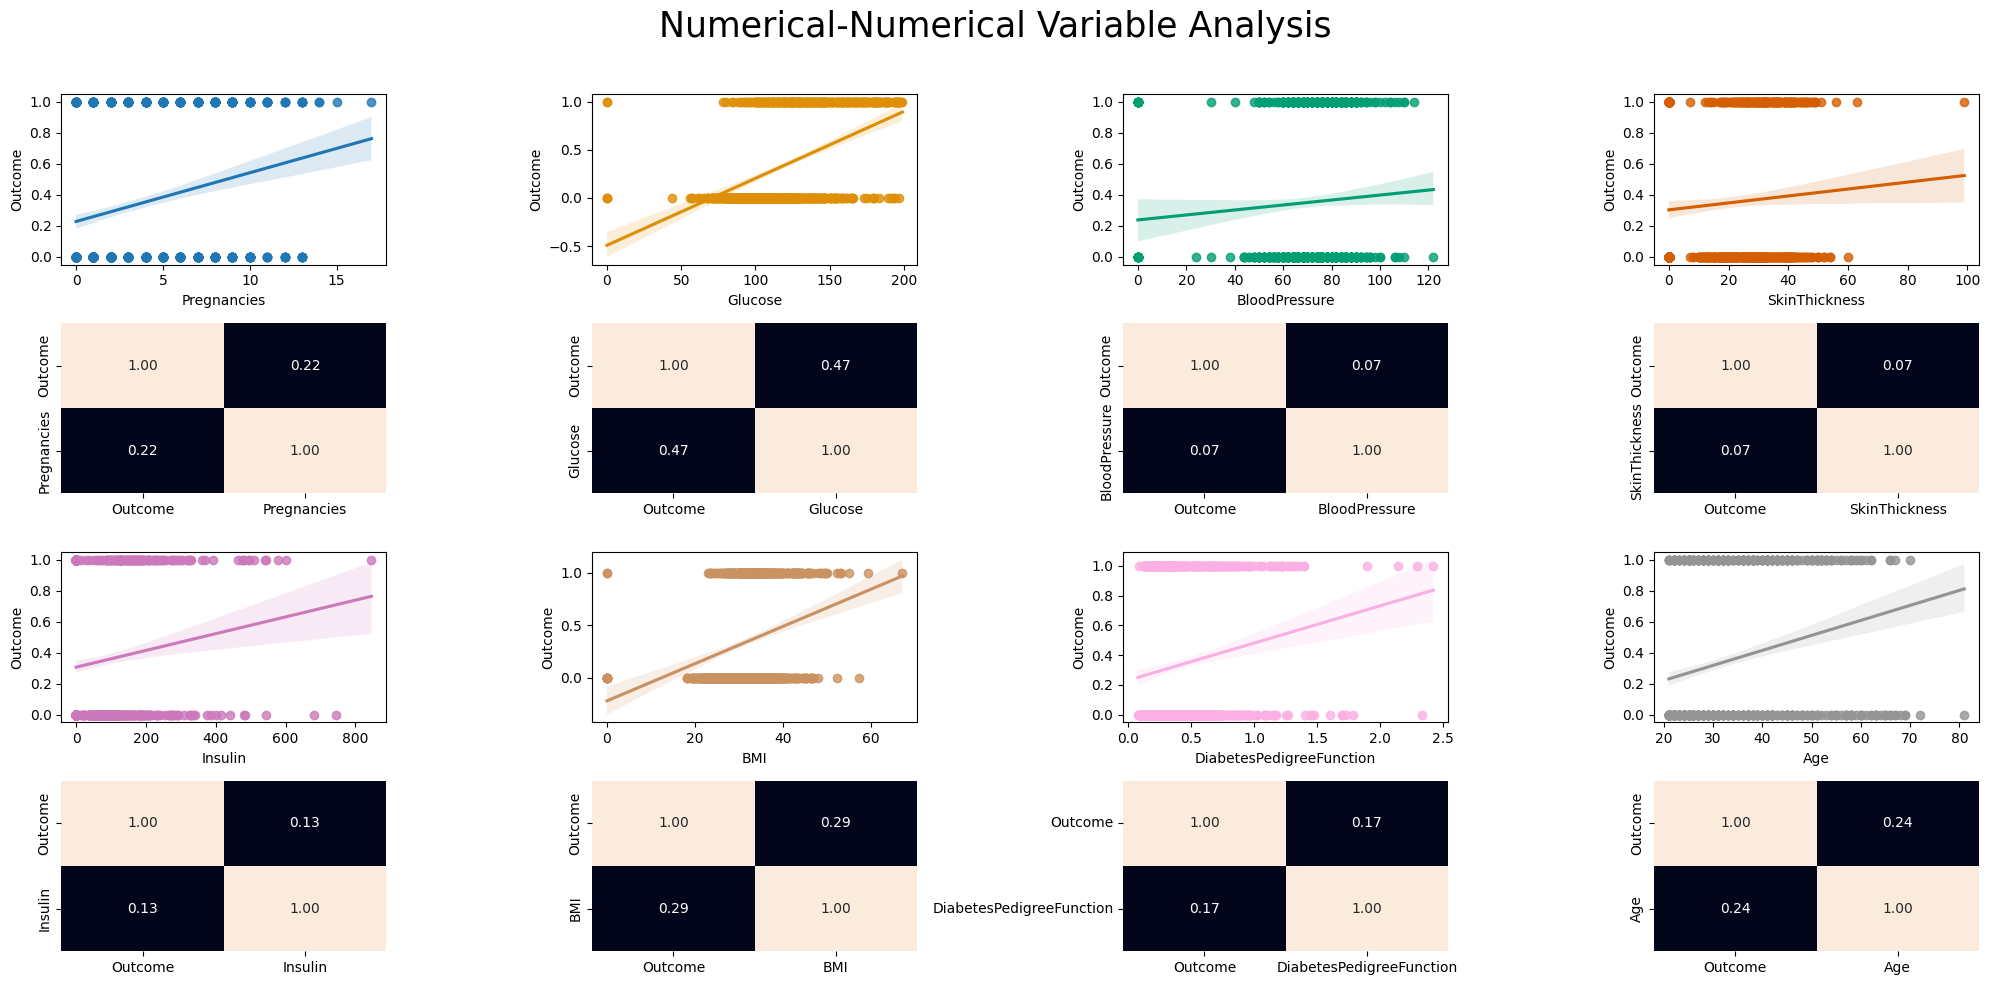

In [10]:
# NUMERICAL-NUMERICAL
fig, axis = plt.subplots(4, 4, figsize = (20, 10))
fig.suptitle("Numerical-Numerical Variable Analysis", fontsize=25)

sns.regplot(ax = axis[0, 0], data = df, x = "Pregnancies", y = "Outcome")
sns.heatmap(df[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "Glucose", y = "Outcome", color=sns.color_palette("colorblind")[1])
sns.heatmap(df[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = df, x = "BloodPressure", y = "Outcome", color=sns.color_palette("colorblind")[2])
sns.heatmap(df[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

sns.regplot(ax = axis[0, 3], data = df, x = "SkinThickness", y = "Outcome", color=sns.color_palette("colorblind")[3])
sns.heatmap(df[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)

sns.regplot(ax = axis[2, 0], data = df, x = "Insulin", y = "Outcome", color=sns.color_palette("colorblind")[4])
sns.heatmap(df[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = df, x = "BMI", y = "Outcome", color=sns.color_palette("colorblind")[5])
sns.heatmap(df[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[2, 2], data = df, x = "DiabetesPedigreeFunction", y = "Outcome", color=sns.color_palette("colorblind")[6])
sns.heatmap(df[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2], cbar = False)

sns.regplot(ax = axis[2, 3], data = df, x = "Age", y = "Outcome", color=sns.color_palette("colorblind")[7])
sns.heatmap(df[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 3], cbar = False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The relationships between the different variables and the Outcome (target):
* Pregnancies: There is a moderate positive relationship between the number of pregnancies and the likelihood of having diabetes. The trend line shows a slight increase in the probability of a positive Outcome as the number of pregnancies increases.
* Glucose: It has a strong positive relationship with Outcome. The regression line's slope is steep, indicating that higher glucose levels are associated with a greater probability of diabetes.
* BloodPressure: The relationship is weaker compared to other features. Although there is a slight upward trend, the dispersion is significant, suggesting that it may not be one of the most determining features.
* SkinThickness: The relationship is weak, with an almost flat trend line and a wide confidence interval, indicating that this feature has a minor impact on Outcome prediction.
* Insulin: It shows a positive relationship but has high variability. Some low and very high insulin values are associated with both outcomes, suggesting a non-linear behavior.
* BMI: It exhibits a significant positive relationship with Outcome, with a clear trend indicating that higher BMI is associated with a greater probability of diabetes.
* DiabetesPedigreeFunction: There is a moderate correlation, indicating that a higher genetic predisposition is associated with a greater probability of diabetes, although variability is high.
* Age: Age has a positive relationship with Outcome. As age increases, the likelihood of having diabetes also increases.

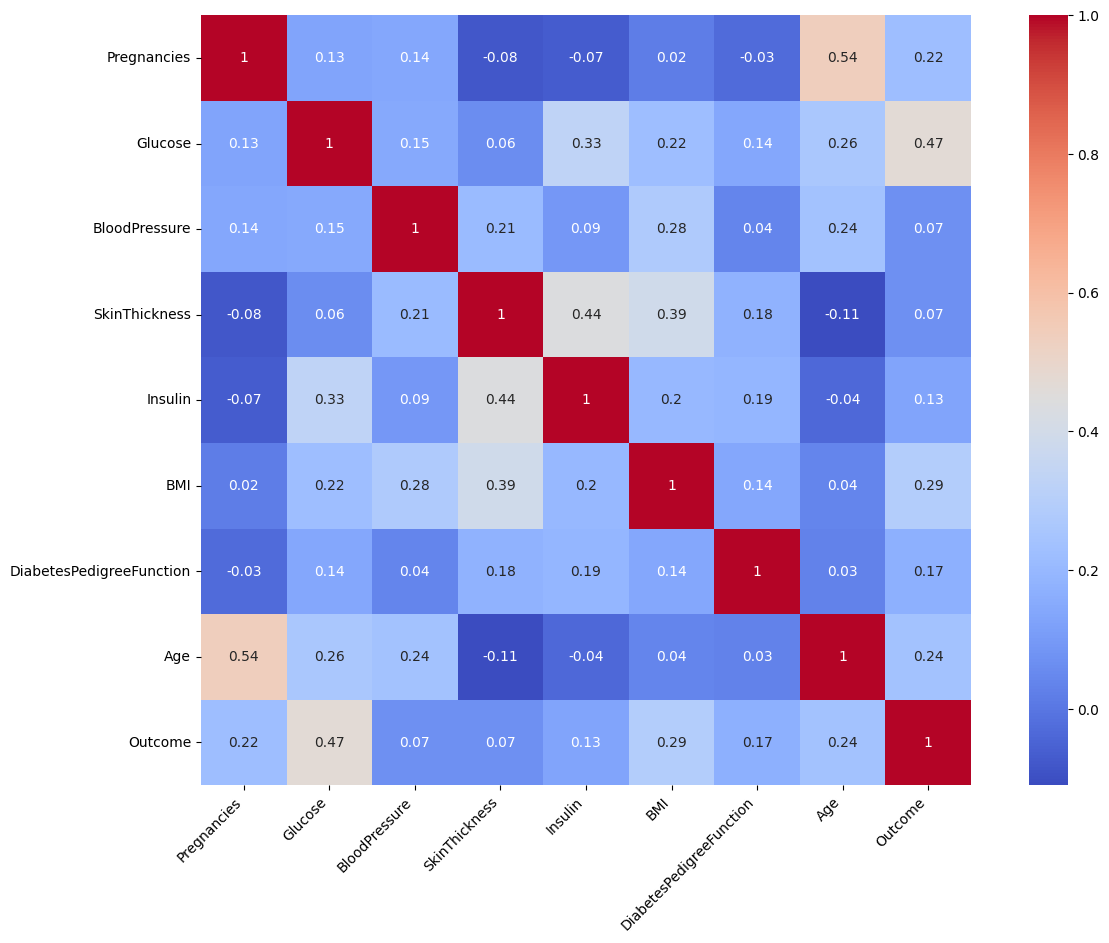

In [19]:
# 4.1. CORRELATION ANALYSIS
plt.figure(figsize=(15, 10))
sns.heatmap(df_enc.corr().round(2), annot=True, cmap='coolwarm', square=True)
plt.xticks(rotation=45, ha='right')

plt.show()

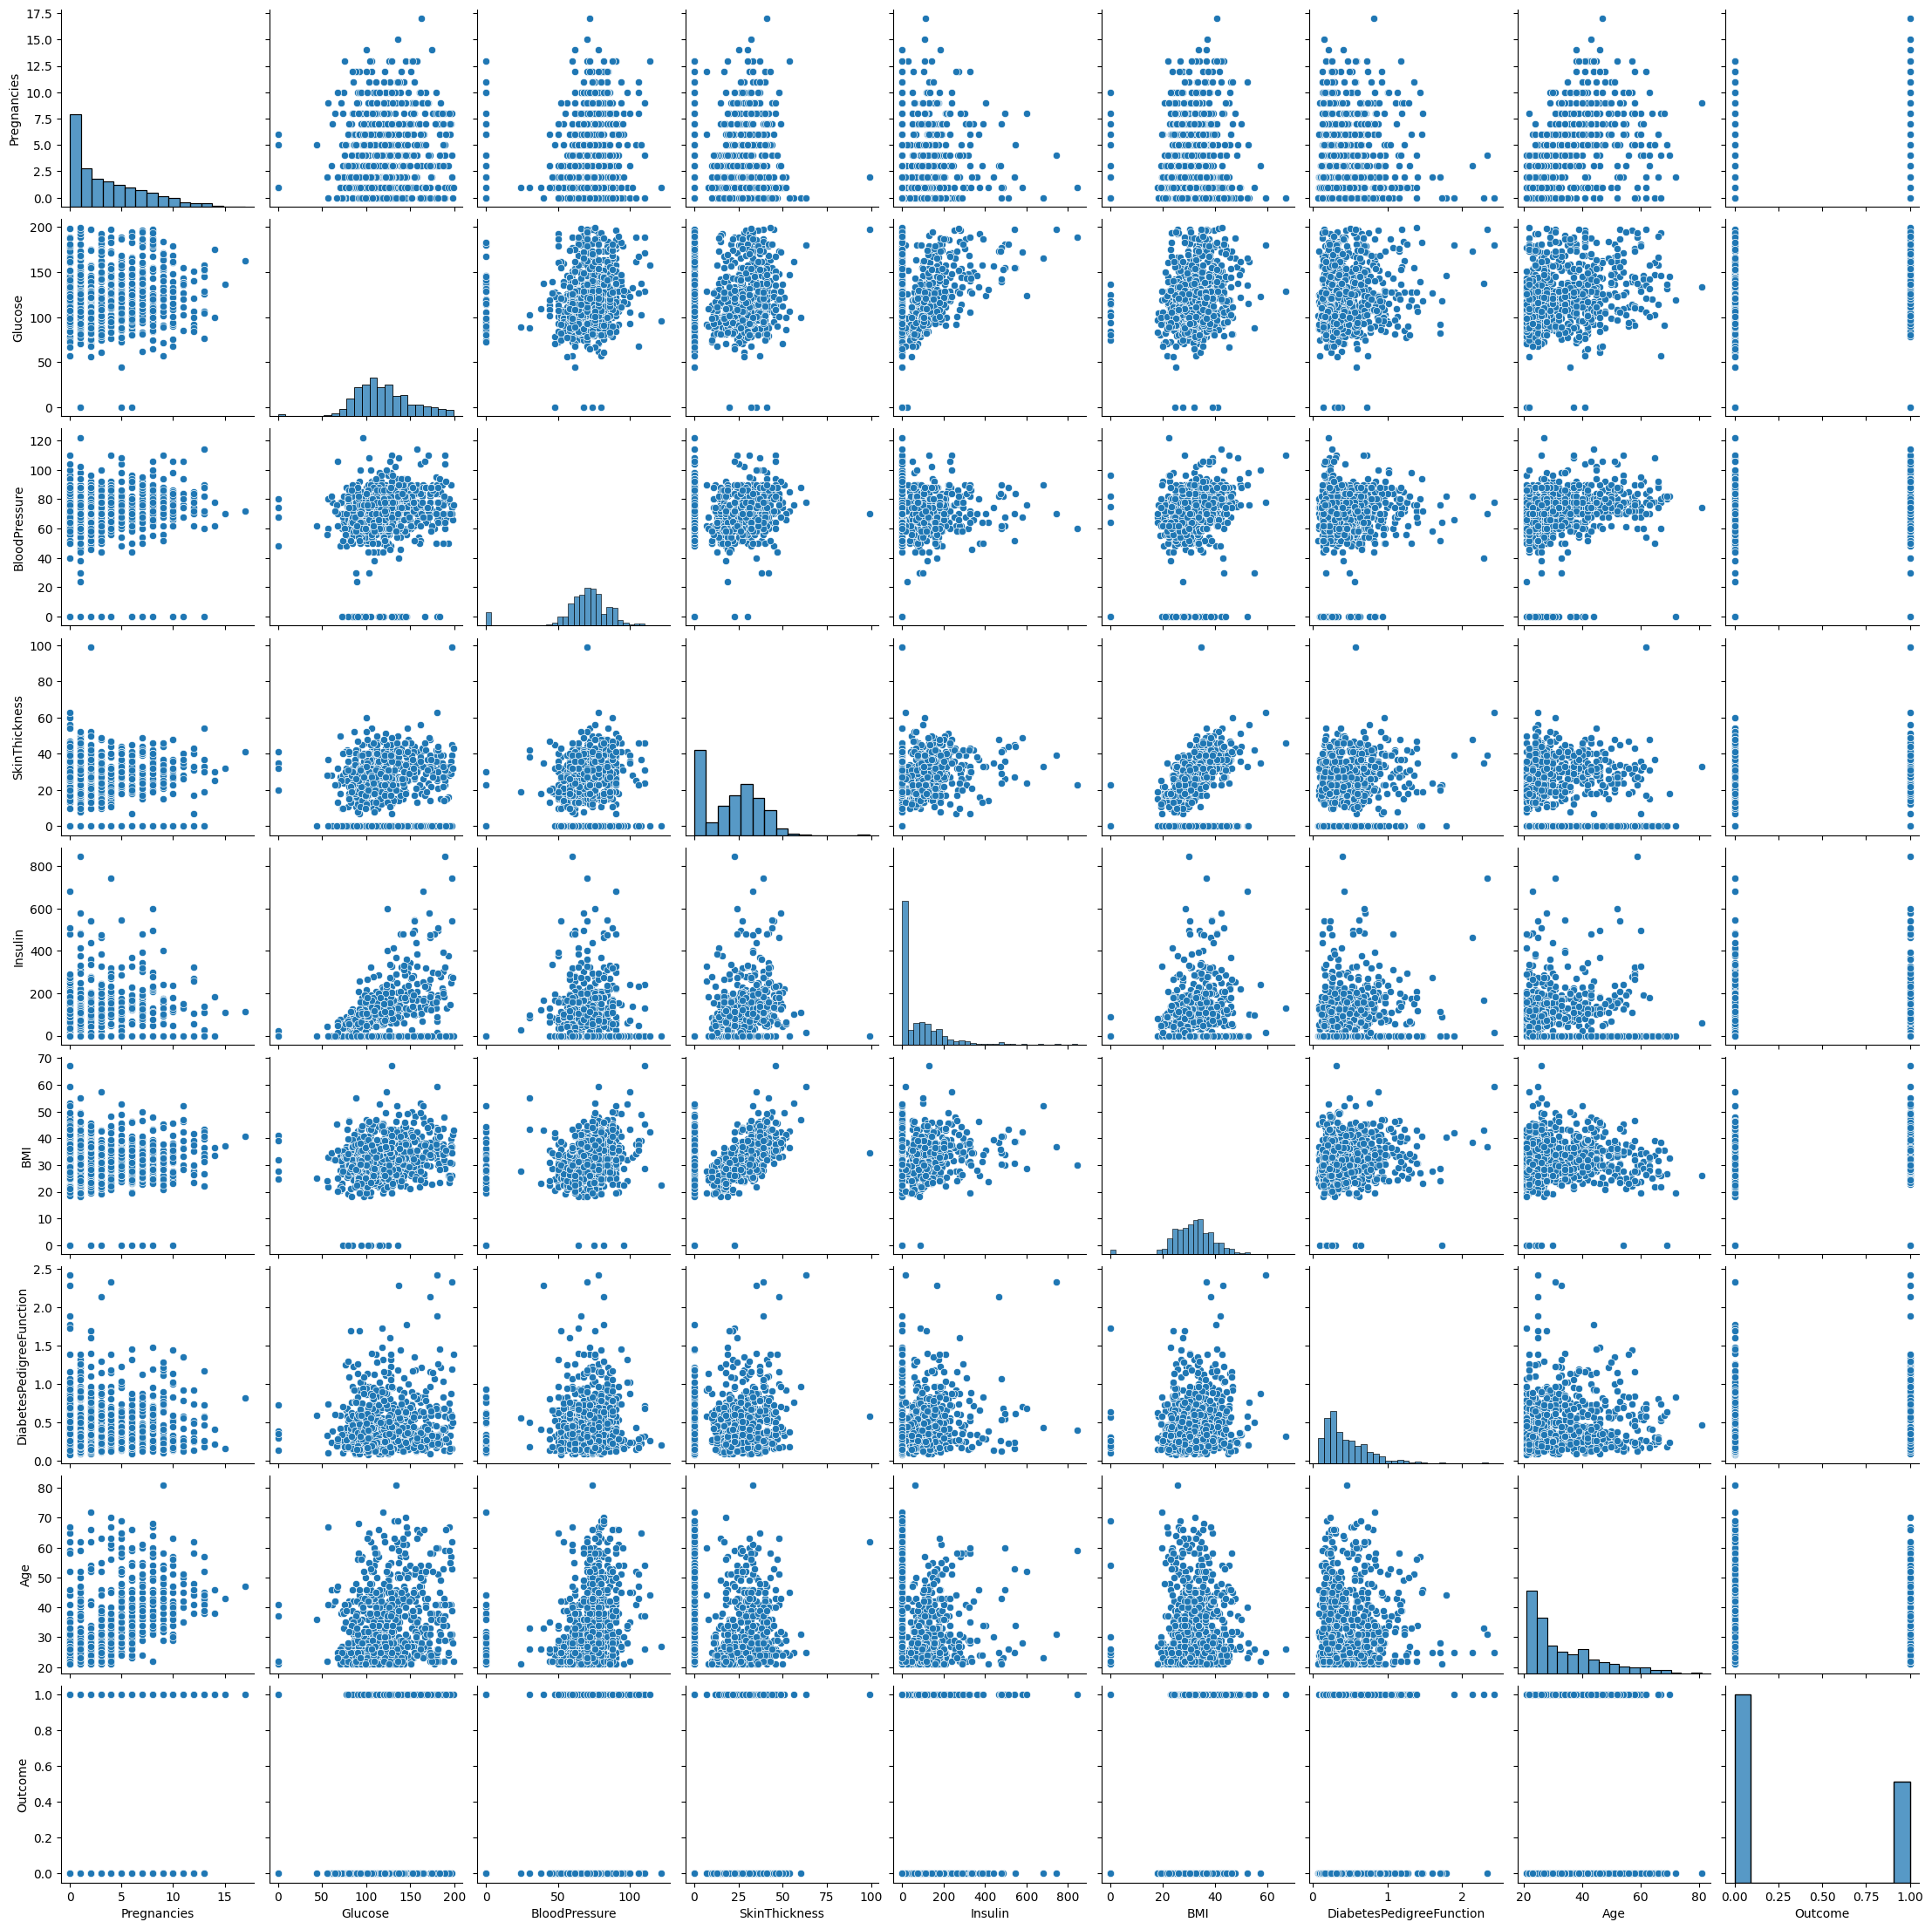

In [12]:
sns.pairplot(data = df)

5. FEATURE ENGINEERING

In [17]:
# 5.1. OUTLIER ANALYSIS
df_enc.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


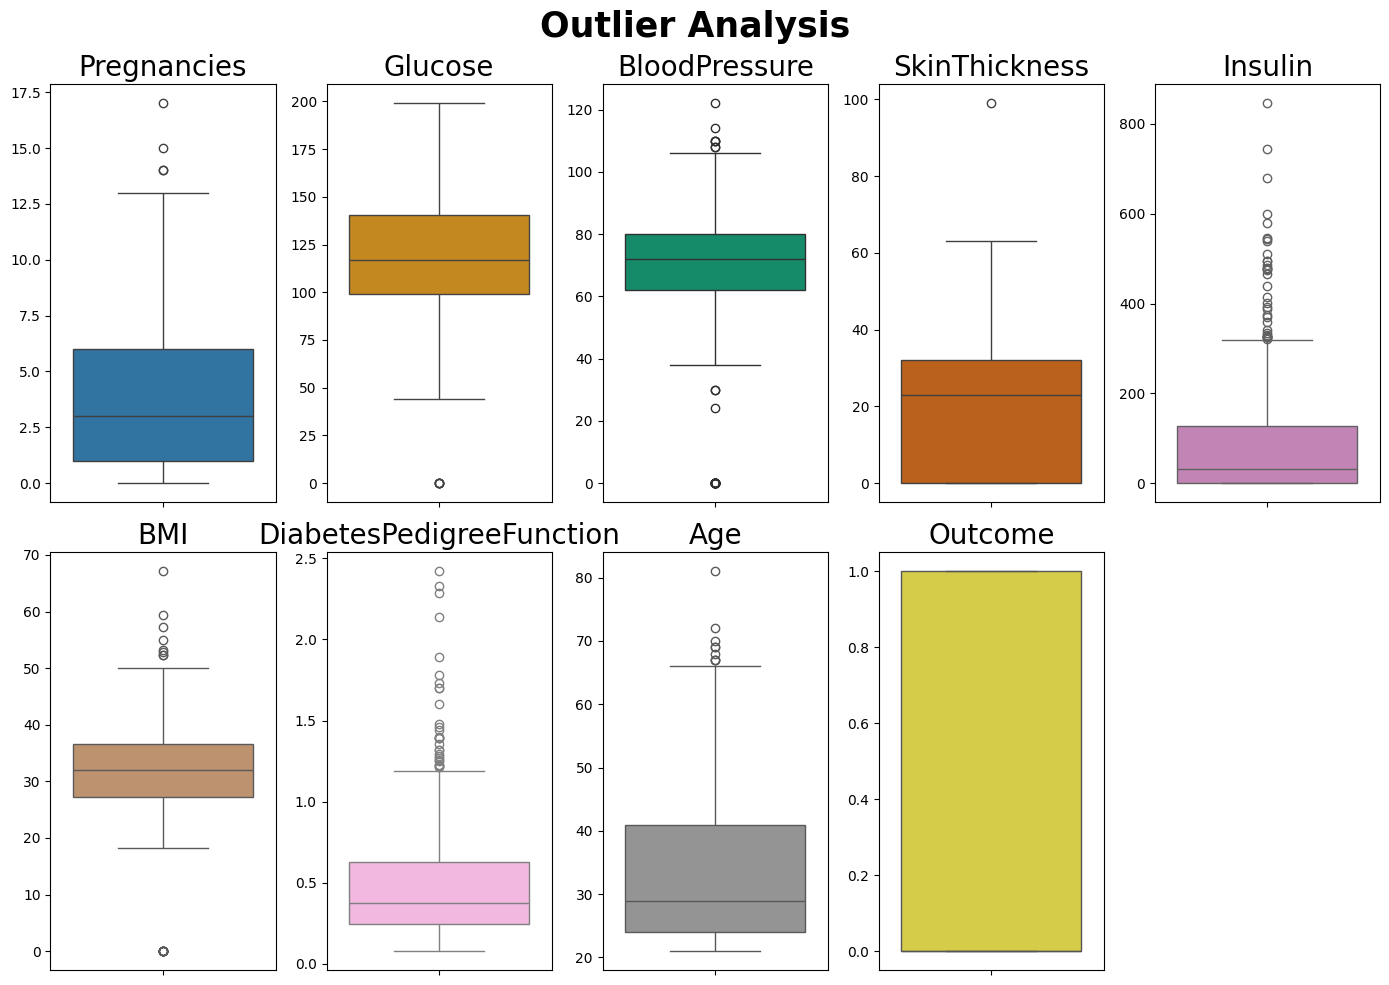

In [14]:
fig, axes = plt.subplots(2, 5, figsize = (14, 10))
fig.suptitle("Outlier Analysis", fontsize=25, fontweight='bold')

sns.boxplot(ax = axes[0, 0], data = df_enc, y = "Pregnancies").set_title("Pregnancies", fontsize=20)
sns.boxplot(ax = axes[0, 1], data = df_enc, y = "Glucose", color=sns.color_palette("colorblind")[1]).set_title("Glucose", fontsize=20)
sns.boxplot(ax = axes[0, 2], data = df_enc, y = "BloodPressure", color=sns.color_palette("colorblind")[2]).set_title("BloodPressure", fontsize=20)
sns.boxplot(ax = axes[0, 3], data = df_enc, y = "SkinThickness", color=sns.color_palette("colorblind")[3]).set_title("SkinThickness", fontsize=20)
sns.boxplot(ax = axes[0, 4], data = df_enc, y = "Insulin", color=sns.color_palette("colorblind")[4]).set_title("Insulin", fontsize=20)
sns.boxplot(ax = axes[1, 0], data = df_enc, y = "BMI", color=sns.color_palette("colorblind")[5]).set_title("BMI", fontsize=20)
sns.boxplot(ax = axes[1, 1], data = df_enc, y = "DiabetesPedigreeFunction", color=sns.color_palette("colorblind")[6]).set_title("DiabetesPedigreeFunction", fontsize=20)
sns.boxplot(ax = axes[1, 2], data = df_enc, y = "Age", color=sns.color_palette("colorblind")[7]).set_title("Age", fontsize=20)
sns.boxplot(ax = axes[1, 3], data = df_enc, y = "Outcome", color=sns.color_palette("colorblind")[8]).set_title("Outcome", fontsize=20)
fig.delaxes(axes[1, 4])

for ax in axes.flatten():
    if ax: 
        ax.set(ylabel=None)
        
plt.tight_layout()
plt.show()

Conclusions:
1. Pregnancies: It has high outliers, but most values are between 0 and 6. It may be useful for predicting diabetes.
2. Glucose: Values are concentrated between 80 and 150, but there are some low outliers. Glucose is one of the most relevant variables for detecting diabetes, so it should be one of the first branches in the decision tree.
3. BloodPressure: There are both high and low outliers, but most values fall between 60 and 80. Blood pressure can be a useful variable in combination with other features.
4. SkinThickness: It shows several high outliers and a common range between 20 and 40. Subcutaneous fat is a factor to consider, although its impact may not be as strong as glucose.
5. Insulin: It has many high outliers and a concentrated range between 0 and 300. Insulin is relevant, as abnormal production can indicate diabetes. This variable is likely to be important in the decision tree as well.
6. BMI (Body Mass Index): With a range between 20 and 40, it has some outliers. BMI is a common predictor for diabetes, so it should be considered in the tree.
7. DiabetesPedigreeFunction: It has several outliers, but most values are below 1. This variable indicates genetic inheritance, which is useful for assessing diabetes risk.
8. Age: It shows outliers, with most values between 25 and 50. Age can be relevant, as the risk of diabetes increases with age.

In [15]:
# Copy df without Outliers 
df_enc_no = df_enc.copy()

In [20]:
# REMOVE OUTLIERS
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [21]:
df_enc_no['Pregnancies'] = remove_outliers(df_enc_no['Pregnancies'], 'Pregnancies')
df_enc_no['Glucose'] = remove_outliers(df_enc_no['Glucose'], 'Glucose')
df_enc_no['SkinThickness'] = remove_outliers(df_enc_no['SkinThickness'], 'SkinThickness')
df_enc_no['BloodPressure'] = remove_outliers(df_enc_no['BloodPressure'], 'BloodPressure')
df_enc_no['Insulin'] = remove_outliers(df_enc_no['Insulin'], 'Insulin')
df_enc_no['BMI'] = remove_outliers(df_enc_no['BMI'], 'BMI')
df_enc_no['DiabetesPedigreeFunction'] = remove_outliers(df_enc_no['DiabetesPedigreeFunction'], 'DiabetesPedigreeFunction')
df_enc_no['Age'] = remove_outliers(df_enc_no['Age'], 'Age')

In [22]:
# 5.2. MISSING VALUES
df_enc.isna().sum().sort_values(ascending=False) / len(df)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [23]:
# 5.3. SLIT TRAIN/TEST OF BOTH DFs
def split(target, df, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [24]:
# SPLIT ORIGINAL DF
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('Outcome', df_enc)
X_train_without_outliers, X_test_without_outliers, _, _ = split('Outcome', df_enc_no)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

In [25]:
# OUTLIER DETECTION FOR AGE
    # AGE STATS
age_stats = df["Age"].describe()
age_stats

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [26]:
# 5.4. NORMALIZATION
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'../data/interim/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [27]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

In [28]:
# 5.5. MIN-MAX SCALING
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'../data/interim/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [29]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

6. FEATURE SELECTION

In [30]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/interim/selection_model_{reference}.sav', 'wb'))

    return X_train_sel, X_test_sel  

In [31]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 9, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 9, 'without_outliers')

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=9 is greater than n_features=8. All the features will be returned.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=9 is greater than n_features=8. All the features will be returned.
  warnings.warn(


In [32]:
# 6.1. FILTER NORMALIZED AND MIN-MAX SCALED DFs
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

In [33]:
# 6.2. SAVE CSV FILES
dfs_train = [X_train_with_outliers_sel, X_train_without_outliers_sel, 
             X_train_with_outliers_norm_sel, X_train_without_outliers_norm_sel, 
             X_train_with_outliers_minmax_sel, X_train_without_outliers_minmax_sel]

dfs_test = [X_test_with_outliers_sel, X_test_without_outliers_sel, 
            X_test_with_outliers_norm_sel, X_test_without_outliers_norm_sel, 
            X_test_with_outliers_minmax_sel, X_test_without_outliers_minmax_sel]

In [34]:
# TRAIN DFs
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)

# TEST DFs
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)

MACHINE LEARNING

DECISION MAKING. WHICH IS THE BEST DS?

** Decision Making Note
- La precisión es elevada para train y test → Termino
- La precisión es baja para train y test → Modelo no adecuado
- La precisión es elevada para train y baja para test → Fenómeno de Overfitting

In [35]:
# TRAIN DFs
X_train_with_outliers_sel = pd.read_csv('../data/processed/X_train_with_outliers_sel.csv')
X_train_without_outliers_sel = pd.read_csv('../data/processed/X_train_without_outliers_sel.csv')
X_train_with_outliers_norm_sel = pd.read_csv('../data/processed/X_train_with_outliers_norm_sel.csv')
X_train_without_outliers_norm_sel = pd.read_csv('../data/processed/X_train_without_outliers_norm_sel.csv')
X_train_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_with_outliers_minmax_sel.csv')
X_train_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_without_outliers_minmax_sel.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')

# TEST DFs
X_test_with_outliers_sel = pd.read_csv('../data/processed/X_test_with_outliers_sel.csv')
X_test_without_outliers_sel = pd.read_csv('../data/processed/X_test_without_outliers_sel.csv')
X_test_with_outliers_norm_sel = pd.read_csv('../data/processed/X_test_with_outliers_norm_sel.csv')
X_test_without_outliers_norm_sel = pd.read_csv('../data/processed/X_test_without_outliers_norm_sel.csv')
X_test_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_with_outliers_minmax_sel.csv')
X_test_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_without_outliers_minmax_sel.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

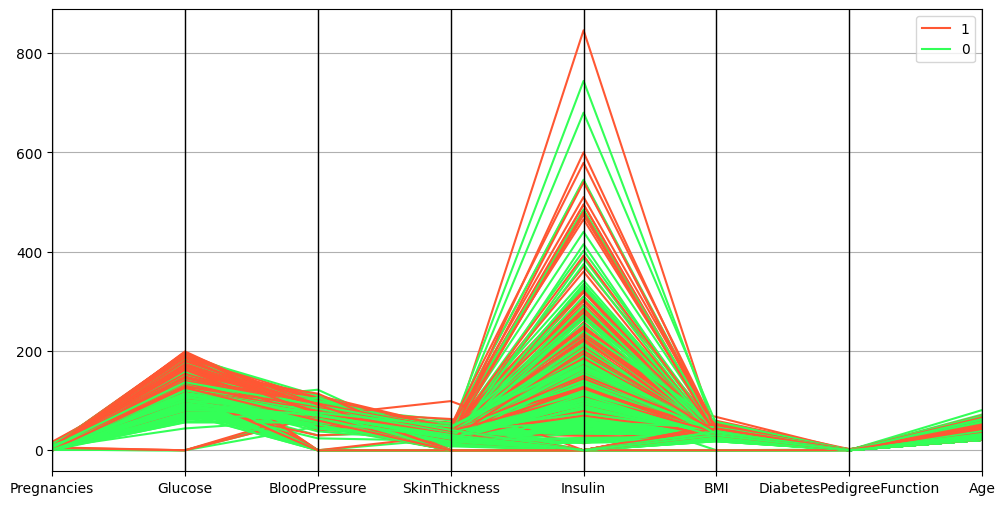

In [36]:
#Visualizamos la relación entre las variables
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(df, "Outcome", color = ("#FF5733", "#33FF57", "#3357FF"))

plt.show()

This parallel coordinates plot shows the distribution of variables for individuals with diabetes (in orange, labeled as "1") and without diabetes (in green, labeled as "0"). Below is an analysis of each variable and its potential relationship with diabetes:
1. Pregnancies: Pregnancy values tend to be higher in individuals with diabetes (orange). This suggests that it could be an important factor in diabetes classification, particularly for distinguishing between cases with high and low values.
2. Glucose: The difference between individuals with and without diabetes is evident. Cases with diabetes (orange) have higher glucose levels than those without diabetes (green). This confirms that glucose is a key variable for predicting diabetes.
3. BloodPressure: Blood pressure does not show a clear difference between individuals with and without diabetes. This may indicate that, in this dataset, blood pressure has a weak relationship with diabetes.
4. SkinThickness: Most skin thickness values fall within a similar range for both groups, although some individuals with diabetes have higher values. This variable may be relevant but not as important as others.
5. Insulin: Insulin values are significantly higher in individuals with diabetes (orange), with greater variability. This suggests that it is a very important variable in diabetes prediction and should be prioritized in the decision tree.
6. BMI (Body Mass Index): BMI levels are generally high for both groups, but individuals with diabetes tend to have slightly higher values. This variable may also be useful, though less discriminative than glucose or insulin.
7. DiabetesPedigreeFunction: There is a slight trend indicating that diabetes pedigree function values tend to be higher in individuals with diabetes, suggesting a genetic influence that could aid in classification.
8. Age: Age shows a slight trend where individuals with diabetes tend to be older, but the difference is not very pronounced.

# RANDOM FOREST

In [37]:
datasets = {
    "With Outliers": (X_train_with_outliers_sel, X_test_with_outliers_sel),
    "Without Outliers": (X_train_without_outliers_sel, X_test_without_outliers_sel),
    "With Outliers (Normalized)": (X_train_with_outliers_norm_sel, X_test_with_outliers_norm_sel),
    "Without Outliers (Normalized)": (X_train_without_outliers_norm_sel, X_test_without_outliers_norm_sel),
    "With Outliers (MinMax)": (X_train_with_outliers_minmax_sel, X_test_with_outliers_minmax_sel),
    "Without Outliers (MinMax)": (X_train_without_outliers_minmax_sel, X_test_without_outliers_minmax_sel)
}

y_train = y_train.values.ravel() if len(y_train.shape) > 1 else y_train
y_test = y_test.values.ravel() if len(y_test.shape) > 1 else y_test

results = []
models = []

for df_index, (name, (X_train, X_test)) in enumerate(datasets.items()):
    model = RandomForestClassifier(random_state=42, n_estimators=80)
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results.append({
        "Dataset": name,
        "Train Score": accuracy_score(y_train, y_train_pred),
        "Test Score": accuracy_score(y_test, y_test_pred)
    })
    models.append(model)

sorted_results = sorted(results, key=lambda x: x["Train Score"], reverse=True)

for result in sorted_results:
    print(f"Model: {result['Dataset']}")
    print(f"Train Score: {result['Train Score']:.4f}")
    print(f"Test Score: {result['Test Score']:.4f}")
    print("-" * 30)

Model: With Outliers
Train Score: 1.0000
Test Score: 0.7792
------------------------------
Model: Without Outliers
Train Score: 1.0000
Test Score: 0.7662
------------------------------
Model: With Outliers (Normalized)
Train Score: 1.0000
Test Score: 0.7857
------------------------------
Model: Without Outliers (Normalized)
Train Score: 1.0000
Test Score: 0.7662
------------------------------
Model: With Outliers (MinMax)
Train Score: 1.0000
Test Score: 0.7792
------------------------------
Model: Without Outliers (MinMax)
Train Score: 1.0000
Test Score: 0.7662
------------------------------


Conclusions: 

*** Best models is
* X_TRAIN_WITH_OUTLIERS_NORM

# MODEL OPTIMIZATION

In [39]:
hyperparams = {
    "n_estimators": [50, 100, 200], 
    "criterion": ['gini', "entropy"], 
    "max_depth":[None, 10, 20, 30], 
    "min_samples_split":[2, 5, 10], 
    "min_samples_leaf":[1, 2, 4], 
    "max_features":['sqrt', "log2", "auto", None], 
    "max_leaf_nodes":[None, 10, 15], 
    "bootstrap":[True, False],
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10, n_jobs = 2)
grid

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=80, random_state=42),
             n_jobs=2,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', 'auto', None],
                         'max_leaf_nodes': [None, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [40]:
grid.fit(X_test_with_outliers_sel, y_test)
print(f"The best hyperparameters are: {grid.best_params_}")

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12960 fits failed out of a total of 51840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6576 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/vscod

The best hyperparameters are: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [41]:
model = RandomForestClassifier(bootstrap= False, criterion= "entropy", max_depth= None, max_features= "sqrt", max_leaf_nodes= 10, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100, random_state = 42)
model.fit(X_test_with_outliers_sel, y_test)

model = grid.best_estimator_
y_test_pred = model.predict(X_test_with_outliers_sel)
print(accuracy_score(y_test, y_test_pred))

0.922077922077922


In [42]:
dump(model, open("../models/randomforest_classifier__boot-Fal_criterion-entr_max_depth-None_max_feat-sqrt_max_nod-10_min_samples-1_min_split-10_n_est-100_42.sav", "wb"))